In [73]:
# SVR

using DataFrames
using CSV
using Random
using MLDataUtils
using MLPreprocessing
using GLM
using Random
import SVR

Random.seed!(0)

# Importing the dataset
df = CSV.File("Position_Salaries.csv") |> DataFrames.DataFrame!;

df_X = DataFrame(X = df[!, :Level])
df_y   = DataFrame(y = df[!, :Salary])

sc_X = fit(StandardScaler, df_X);
sc_y = fit(StandardScaler, df_y);

In [75]:
sc_X = transform(df_X, sc_X);
sc_y = transform(df_y, sc_y);

In [76]:
X = reshape(sc_X.X, (length(sc_X.X), 1));
y = sc_y.y;

In [77]:
svrmodel = SVR.train(y, permutedims(X), kernel_type = SVR.RBF);

┌ Warning: Dependent variables should be normalized!
└ @ SVR /Users/bvdmitri/.julia/packages/SVR/5iueM/src/SVR.jl:228


In [78]:
y_pred = SVR.predict(svrmodel, permutedims(X));

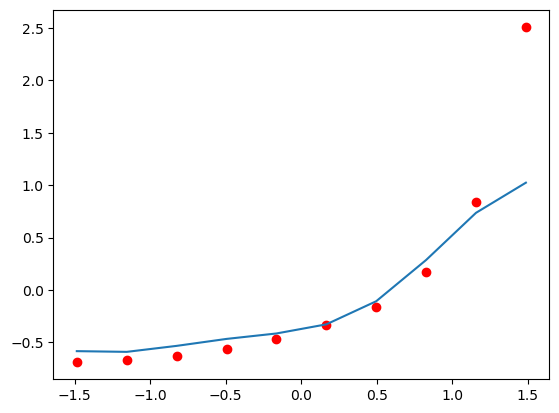

In [79]:
using PyPlot

scatter(X, y, color = :red)
plot(X, y_pred)
show()